## DAY 22 Image Processing, PDF Processing, Webscraping

#### 1.	Read a jpeg image and print the image file

In [1]:
from PIL import Image, ImageFilter

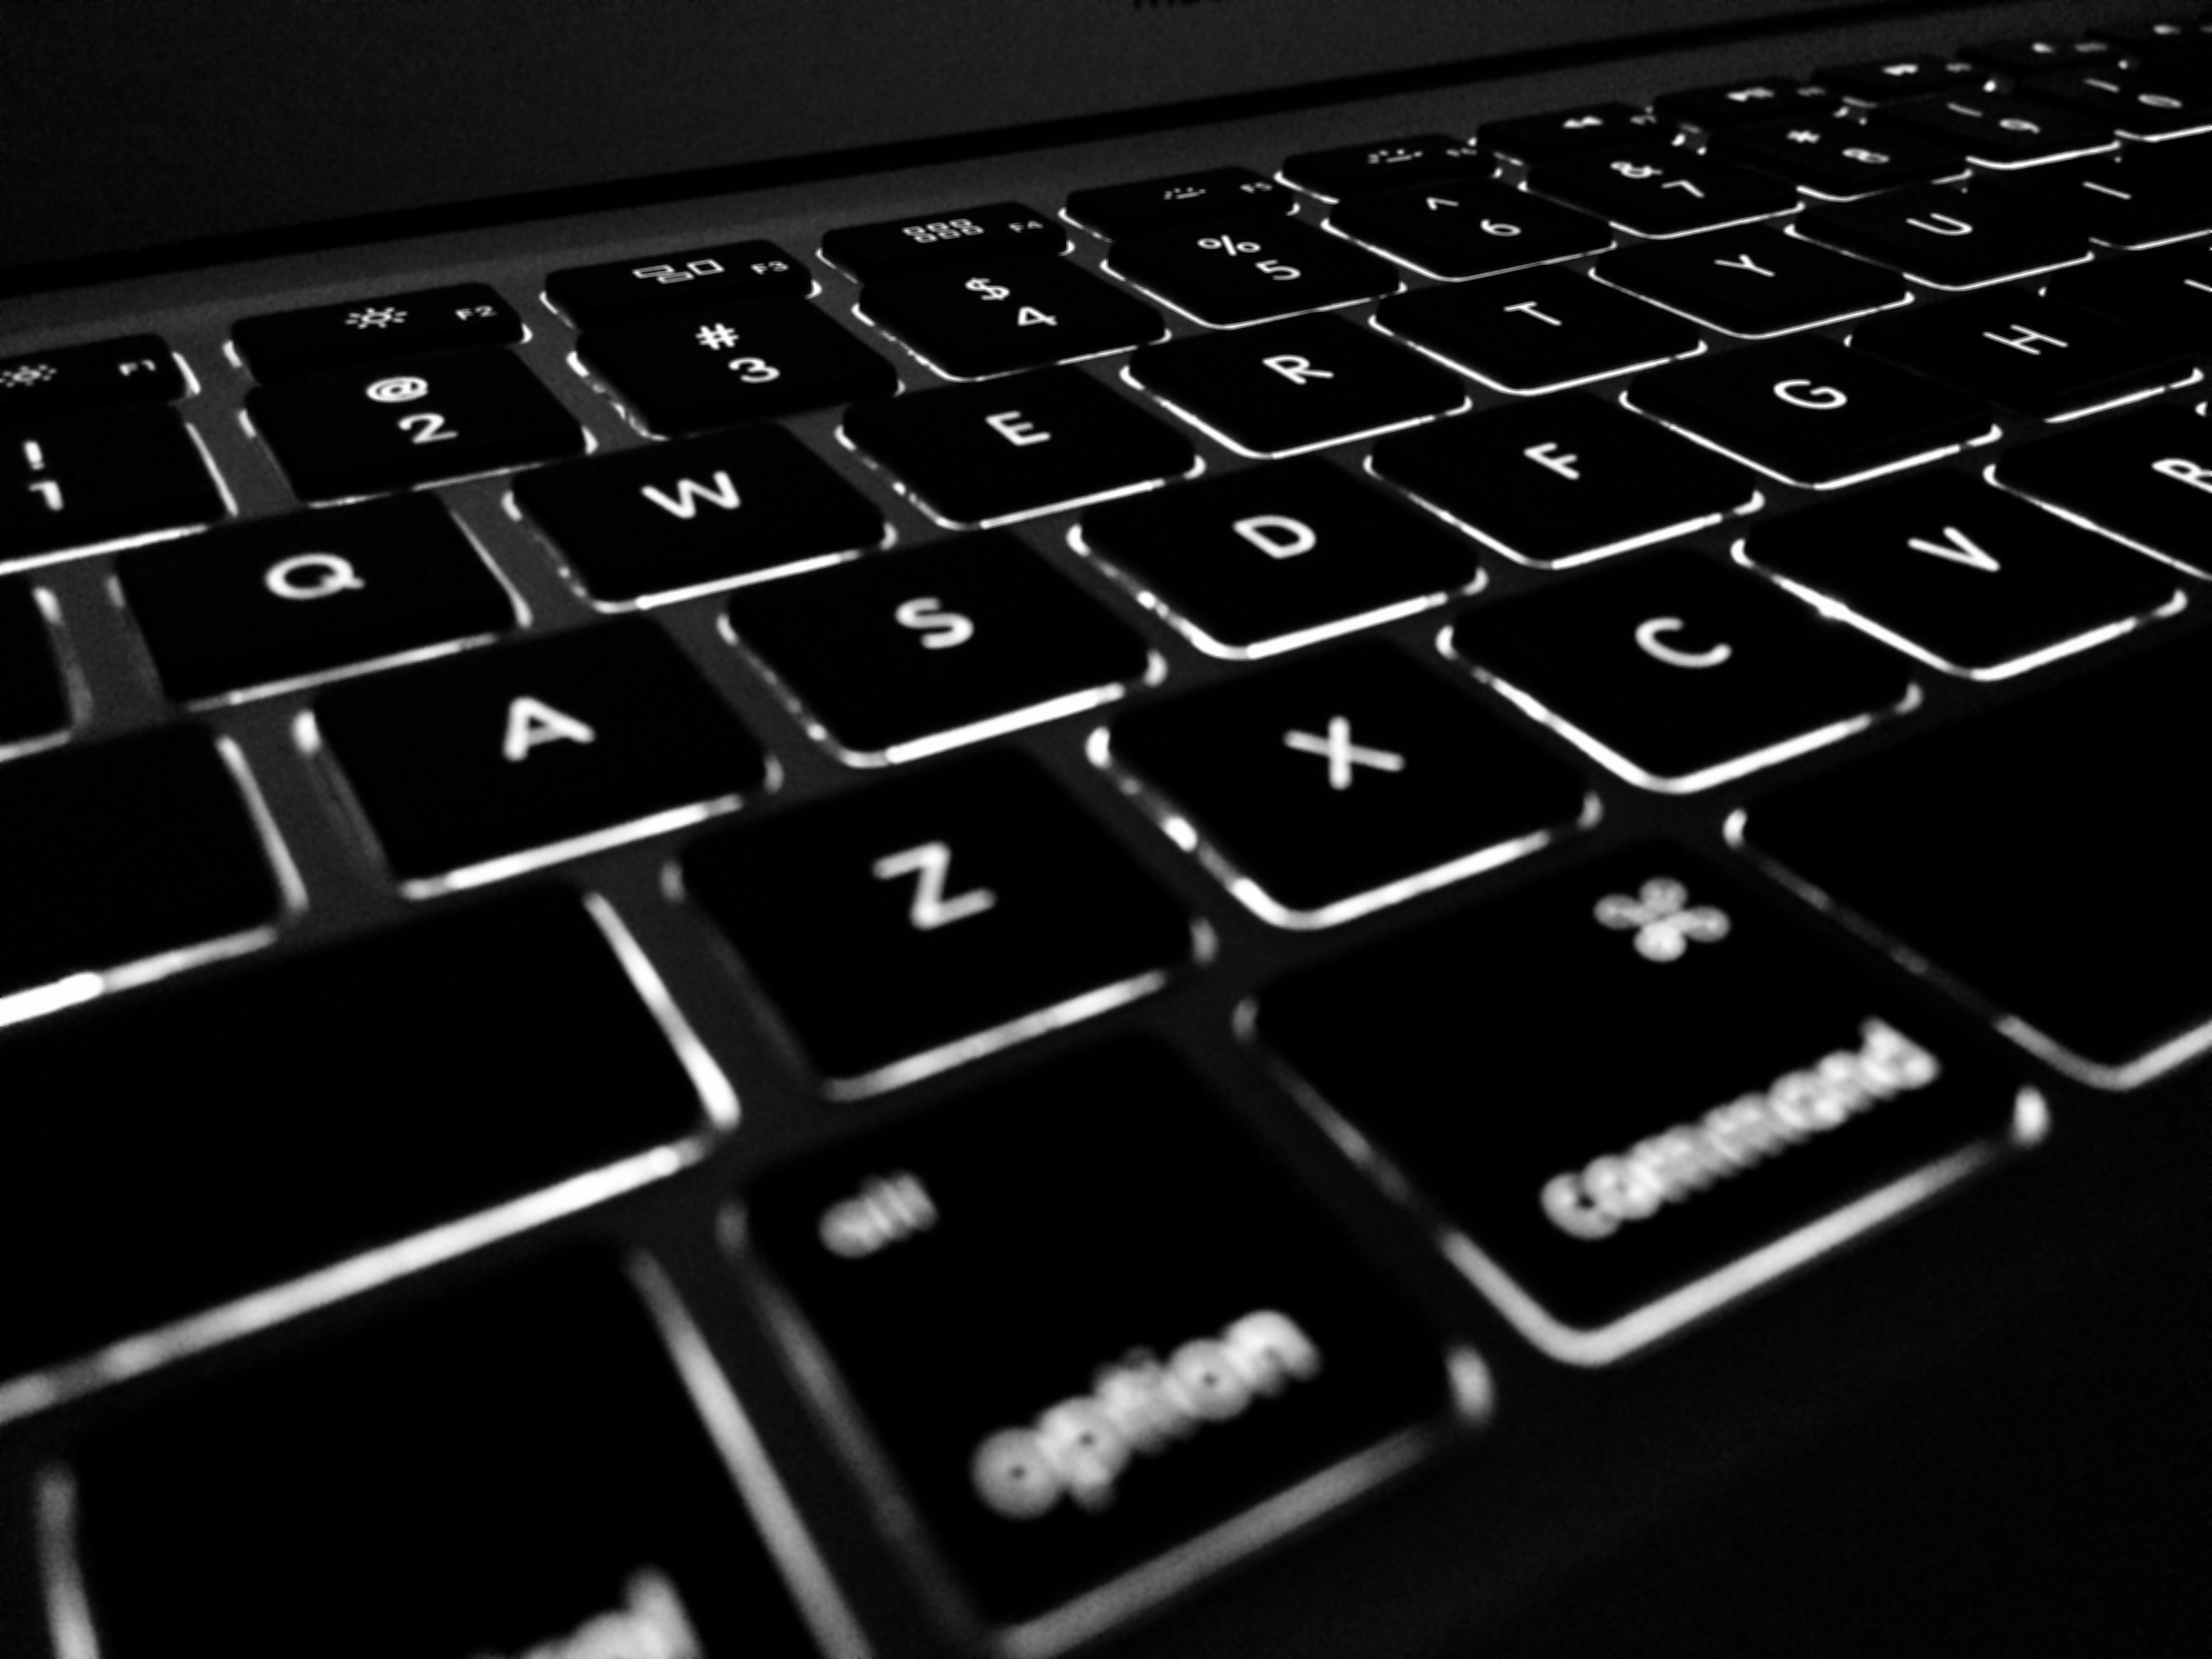

In [3]:
img = Image.open('E:\\HD Images\\black_keyboard.jpg')
filter_img = img.filter(ImageFilter.BLUR)
filter_img

#### .

#### 2.	Merge two pdf files using python script

In [6]:
import PyPDF2

In [11]:
pdfs = ['pdf1.pdf' , 'pdf2.pdf']

merger = PyPDF2.PdfFileMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("result.pdf")
print('Successfully Merged Your PDF file!')
merger.close()

Successfully Merged Your PDF file!


#### 3.	Scrape a website and store the data into DB.

In [14]:
import requests as req
from bs4 import BeautifulSoup
import mysql.connector

In [15]:
Name = []
Price = []
Ratings = []

url = 'https://www.flipkart.com/search?q=redmi%20mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
r = req.get(url)
soup = BeautifulSoup(r.content,'html.parser')

name = soup.find_all('div',class_ = '_4rR01T')
price = soup.find_all('div',class_ = '_30jeq3 _1_WHN1')
ratings = soup.find_all('div',class_ = '_3LWZlK')

for i in name:
    Name.append(i.text)
for j in price:
    Price.append(j.text)
for k in ratings:
    Ratings.append(k.text)
    
Name = list(map(lambda x:x.replace('(',''),Name))
Name = list(map(lambda x:x.replace(')',''),Name))
Name = list(map(lambda x:x.replace(',',''),Name))
Price = list(map(lambda x:x.replace('₹',''),Price))
Price = list(map(lambda x:x.replace(',',''),Price))

Data = list(zip(Name,Price,Ratings))
Data

[('Redmi 8A Dual Midnight Grey 32 GB', '8199', '4.2'),
 ('Redmi 9 Carbon Black 64 GB', '9798', '4.2'),
 ('Redmi 9A Midnight Black 32 GB', '7395', '4.3'),
 ('Redmi 9A SeaBlue 32 GB', '7396', '4.3'),
 ('Redmi 9A Nature Green 32 GB', '7349', '4.3'),
 ('Redmi 9A Nature Green 32 GB', '7932', '4.3'),
 ('Redmi 9A Sea Blue 32 GB', '8015', '4.3'),
 ('Redmi 9 Sporty Orange 64 GB', '9999', '4.2'),
 ('Redmi 9 Sky Blue 64 GB', '9999', '4.2'),
 ('Redmi 9 Sky Blue 128 GB', '10797', '4.2'),
 ('Redmi 8 Onyx Black 64 GB', '10899', '4.4'),
 ('Redmi 6A Rose Gold 16 GB', '6990', '4.3'),
 ('Redmi 8 Emerald Green 64 GB', '10899', '4.4'),
 ('Redmi Note 9 Pro Interstellar Black 64 GB', '15495', '4.4'),
 ('Redmi Note 9 Pro Interstellar Black 128 GB', '16995', '4.4'),
 ('Redmi 8A Sunset Red 32 GB', '8888', '4.3'),
 ('Redmi 6A Blue 32 GB', '7499', '4.3'),
 ('Redmi Note 9 Pro Champagne Gold 128 GB', '16299', '4.4'),
 ('Redmi Note 9 Pro Glacier White 64 GB', '15999', '4.4'),
 ('Redmi K20 Carbon Black 64 GB', '22999

In [21]:
import pandas as pd

In [25]:
df = pd.DataFrame(Data)
df.head(24)

,0,1,2
0,Redmi 8A Dual Midnight Grey 32 GB,8199,4.2
1,Redmi 9 Carbon Black 64 GB,9798,4.2
2,Redmi 9A Midnight Black 32 GB,7395,4.3
3,Redmi 9A SeaBlue 32 GB,7396,4.3
4,Redmi 9A Nature Green 32 GB,7349,4.3
5,Redmi 9A Nature Green 32 GB,7932,4.3
6,Redmi 9A Sea Blue 32 GB,8015,4.3
7,Redmi 9 Sporty Orange 64 GB,9999,4.2
8,Redmi 9 Sky Blue 64 GB,9999,4.2
9,Redmi 9 Sky Blue 128 GB,10797,4.2


In [18]:
#MySQL connection

mydb = mysql.connector.connect(
    host = 'localhost',
    username = 'root',
    password = 'password',
    database = 'Scrapy'
)

db = mydb.cursor()
db.execute('CREATE TABLE Mobile_Details (Name VARCHAR(255),Price VARCHAR(255),Ratings VARCHAR(255))')


In [19]:
db = mydb.cursor()

sql = 'INSERT INTO Mobile_Details (Name, Price, Ratings) VALUES(%s,%s,%s)'

db.executemany(sql,Data)
mydb.commit()

print(db.rowcount, 'records inserted!')

24 records inserted!


#### 4.	Write queries to filter the data in db

In [20]:
db = mydb.cursor()

db.execute('SELECT * FROM Mobile_Details')

res = db.fetchall()

for i in res:
    print(i)

('Redmi 8A Dual Midnight Grey 32 GB', '8199', '4.2')
('Redmi 9 Carbon Black 64 GB', '9798', '4.2')
('Redmi 9A Midnight Black 32 GB', '7395', '4.3')
('Redmi 9A SeaBlue 32 GB', '7396', '4.3')
('Redmi 9A Nature Green 32 GB', '7349', '4.3')
('Redmi 9A Nature Green 32 GB', '7932', '4.3')
('Redmi 9A Sea Blue 32 GB', '8015', '4.3')
('Redmi 9 Sporty Orange 64 GB', '9999', '4.2')
('Redmi 9 Sky Blue 64 GB', '9999', '4.2')
('Redmi 9 Sky Blue 128 GB', '10797', '4.2')
('Redmi 8 Onyx Black 64 GB', '10899', '4.4')
('Redmi 6A Rose Gold 16 GB', '6990', '4.3')
('Redmi 8 Emerald Green 64 GB', '10899', '4.4')
('Redmi Note 9 Pro Interstellar Black 64 GB', '15495', '4.4')
('Redmi Note 9 Pro Interstellar Black 128 GB', '16995', '4.4')
('Redmi 8A Sunset Red 32 GB', '8888', '4.3')
('Redmi 6A Blue 32 GB', '7499', '4.3')
('Redmi Note 9 Pro Champagne Gold 128 GB', '16299', '4.4')
('Redmi Note 9 Pro Glacier White 64 GB', '15999', '4.4')
('Redmi K20 Carbon Black 64 GB', '22999', '4.5')
('Redmi K20 Pro Carbon Black 

In [29]:
db = mydb.cursor()

db.execute('SELECT name,price FROM Mobile_Details WHERE ratings = 4.5')
           
res = db.fetchall()
           
for i in res:
    print(i)

('Redmi K20 Carbon Black 64 GB', '22999')
('Redmi K20 Pro Carbon Black 256 GB', '29999')
('Redmi Y2 Gold 32 GB', '8999')
('Redmi K20 Pro Glacier Blue 128 GB', '28999')
